<a href="https://colab.research.google.com/github/tilly963963/pytorch/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [ ]:
train_dataset = dsets.MNIST(root = './data',
              train = True,
              transform = transforms.ToTensor(),#把資料傳換
              download = True)#預設False
test_dataset = dsets.MNIST(root = './data',
              train = False,
              transform = transforms.ToTensor())#把資料傳換
               

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

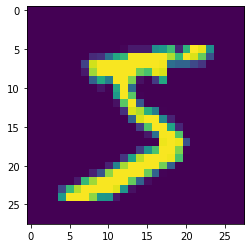

In [ ]:
plt.imshow(train_dataset.data[0])

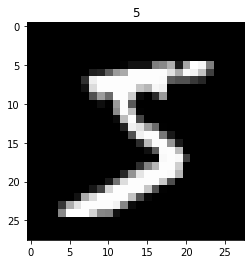

In [ ]:
plt.imshow(train_dataset.data[0].numpy(),cmap='gray')
plt.title("%i"%train_dataset.targets[0])
plt.show()

In [ ]:
input_size = 28*28
num_class = 10
num_epoch = 5
batch_size=100
hidden_size =500
learning_rate = 0.001

In [ ]:
import torch.utils.data as Data

In [ ]:
train_loader = Data.DataLoader(dataset = train_dataset,
              batch_size = batch_size,
              shuffle = True)
test_loader = Data.DataLoader(dataset = test_dataset,
              batch_size = batch_size,
              shuffle = False)

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self,input_size,hidden_size,num_class):
    super(Model,self).__init__()
    self.fcl = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,num_class)
  def forward(self,x):
    out = self.fcl(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
model = Model(input_size, hidden_size, num_class)

In [ ]:
import torch.optim as opt

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(),lr = learning_rate)

In [ ]:
from torch.autograd import Variable

In [ ]:
for epoch in range(num_epoch):
  for i ,(images,labels) in enumerate(train_loader):
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
      print("Epoch:%d, Batch:%d , Loss:%0.4f"
      %(epoch+1,i+1,loss.data))

Epoch:1, Batch:100 , Loss:0.4204
Epoch:1, Batch:200 , Loss:0.2836
Epoch:1, Batch:300 , Loss:0.2919
Epoch:1, Batch:400 , Loss:0.1685
Epoch:1, Batch:500 , Loss:0.0855
Epoch:1, Batch:600 , Loss:0.1943
Epoch:2, Batch:100 , Loss:0.0704
Epoch:2, Batch:200 , Loss:0.2419
Epoch:2, Batch:300 , Loss:0.0553
Epoch:2, Batch:400 , Loss:0.0413
Epoch:2, Batch:500 , Loss:0.1603
Epoch:2, Batch:600 , Loss:0.1226
Epoch:3, Batch:100 , Loss:0.1106
Epoch:3, Batch:200 , Loss:0.1100
Epoch:3, Batch:300 , Loss:0.1374
Epoch:3, Batch:400 , Loss:0.0777
Epoch:3, Batch:500 , Loss:0.0400
Epoch:3, Batch:600 , Loss:0.0466
Epoch:4, Batch:100 , Loss:0.0312
Epoch:4, Batch:200 , Loss:0.0455
Epoch:4, Batch:300 , Loss:0.0630
Epoch:4, Batch:400 , Loss:0.1139
Epoch:4, Batch:500 , Loss:0.0330
Epoch:4, Batch:600 , Loss:0.0628
Epoch:5, Batch:100 , Loss:0.0410
Epoch:5, Batch:200 , Loss:0.0368
Epoch:5, Batch:300 , Loss:0.0475
Epoch:5, Batch:400 , Loss:0.0307
Epoch:5, Batch:500 , Loss:0.0410
Epoch:5, Batch:600 , Loss:0.0282


In [ ]:
import torch

In [ ]:
correct = 0 
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model(images)
  _ ,pred = torch.max(outputs.data,1)#最大值 ,最大值的位置
  correct +=(pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%"%(100.0*float(correct)/float(total)))

Accuracy:97.730%


In [ ]:
for images, labels in test_loader:
  print(images.shape)
  break

torch.Size([100, 1, 28, 28])


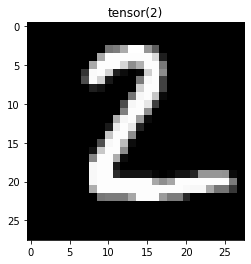

tensor([[-3.7798e+00, -8.9011e+00, -1.4733e+00,  1.4740e+00, -1.3948e+01,
         -6.4138e+00, -2.0898e+01,  9.6002e+00, -4.4709e+00, -2.5301e+00],
        [-4.7279e+00,  1.5944e-01,  1.1739e+01, -5.8396e-03, -2.0892e+01,
         -2.6705e+00, -8.9136e+00, -1.6236e+01, -1.4714e+00, -1.5270e+01]],
       grad_fn=<AddmmBackward>)
tensor([7, 2])


In [ ]:
plt.imshow(images[1][0], cmap='gray')
plt.title(labels[1])
plt.show()
images_flat = Variable(images[:2].view(-1,28*28))
outputs = model(images_flat)
print(outputs)
_, pred_y = torch.max(outputs.data,-1)
print(pred_y)

In [ ]:
torch.save(model.state_dict(),'model.pkl')#存參數

In [ ]:
model2 = Model(input_size, hidden_size, num_class)
model2.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [ ]:
correct = 0 
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model2(images)
  _ ,pred = torch.max(outputs.data,1)#最大值 ,最大值的位置
  correct +=(pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%"%(100.0*float(correct)/float(total)))

Accuracy:97.730%


In [ ]:
torch.save(model2, "model2.pkl")

In [ ]:
model3 = torch.load("model2.pkl")

In [ ]:
correct = 0 
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model3(images)
  _ ,pred = torch.max(outputs.data,1)#最大值 ,最大值的位置
  correct +=(pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%"%(100.0*float(correct)/float(total)))

Accuracy:97.730%


In [ ]:
model4 = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,num_class)
)
print(model)
print(model4)

Model(
  (fcl): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
# optimizer = opt.SGD(model4.parameters(),lr = learning_rate, momentum=0.5)
# optimizer = opt.Adagrad(model4.parameters(),lr = learning_rate, momentum=0.5)
# optimizer = opt.RMSprop(model4.parameters(),lr = learning_rate, momentum=0.5)
optimizer = opt.Adam(model4.parameters(),lr = learning_rate, momentum=0.5)

In [ ]:
for epoch in range(num_epoch):
  for i ,(images,labels) in enumerate(train_loader):
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)
    optimizer.zero_grad()
    outputs = model4(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
      print("Epoch:%d, Batch:%d , Loss:%0.4f"
      %(epoch+1,i+1,loss.data))

Epoch:1, Batch:100 , Loss:0.2272
Epoch:1, Batch:200 , Loss:0.2953
Epoch:1, Batch:300 , Loss:0.1169
Epoch:1, Batch:400 , Loss:0.1175
Epoch:1, Batch:500 , Loss:0.2799
Epoch:1, Batch:600 , Loss:0.2965
Epoch:2, Batch:100 , Loss:0.1303
Epoch:2, Batch:200 , Loss:0.2499
Epoch:2, Batch:300 , Loss:0.0842
Epoch:2, Batch:400 , Loss:0.1465
Epoch:2, Batch:500 , Loss:0.1044
Epoch:2, Batch:600 , Loss:0.2789
Epoch:3, Batch:100 , Loss:0.1705
Epoch:3, Batch:200 , Loss:0.0904
Epoch:3, Batch:300 , Loss:0.0556
Epoch:3, Batch:400 , Loss:0.0645
Epoch:3, Batch:500 , Loss:0.0456
Epoch:3, Batch:600 , Loss:0.0470
Epoch:4, Batch:100 , Loss:0.0276
Epoch:4, Batch:200 , Loss:0.1486
Epoch:4, Batch:300 , Loss:0.0245
Epoch:4, Batch:400 , Loss:0.0369
Epoch:4, Batch:500 , Loss:0.0689
Epoch:4, Batch:600 , Loss:0.0116
Epoch:5, Batch:100 , Loss:0.0081
Epoch:5, Batch:200 , Loss:0.0421
Epoch:5, Batch:300 , Loss:0.0417
Epoch:5, Batch:400 , Loss:0.0617
Epoch:5, Batch:500 , Loss:0.0201
Epoch:5, Batch:600 , Loss:0.0811
